In [3]:
%matplotlib notebook
%run helper_fx.py

Importing required functions...
Initializing session...


In [32]:
# Rat MCH 1.5
file = "C:\\Test Data\\Eelke-181120-135651" # s2, saccharin
# file = "C:\\Test Data\\Eelke-181128-085552"

In [33]:
# This sets the stream names that you want from the file and changes from Box 1 and Box 2
SigBlue = 'D1B2'
SigUV = 'D2B2'

In [34]:
tmp = tdt.read_block(file, evtype=['streams'], store=[SigBlue])
x.data = getattr(tmp.streams, SigBlue)['data']
x.fs = getattr(tmp.streams, SigBlue)['fs']

tmp = tdt.read_block(file, evtype=['streams'], store=[SigUV])
x.dataUV = getattr(tmp.streams, SigUV)['data']

x.ttls = tdt.read_block(file, evtype=['epocs']).epocs

Found Synapse note file: C:\Test Data\Eelke-181120-135651\Notes.txt
read from t=0s to t=2645.53s
Found Synapse note file: C:\Test Data\Eelke-181120-135651\Notes.txt
read from t=0s to t=2645.53s
Found Synapse note file: C:\Test Data\Eelke-181120-135651\Notes.txt
read from t=0s to t=2645.53s


In [35]:
x.set_tick()
x.time2samples()
x.data_filt = correctforbaseline(x.data, x.dataUV)

Ticks set correctly.
t2sMap made correctly.


<IPython.core.display.Javascript object>


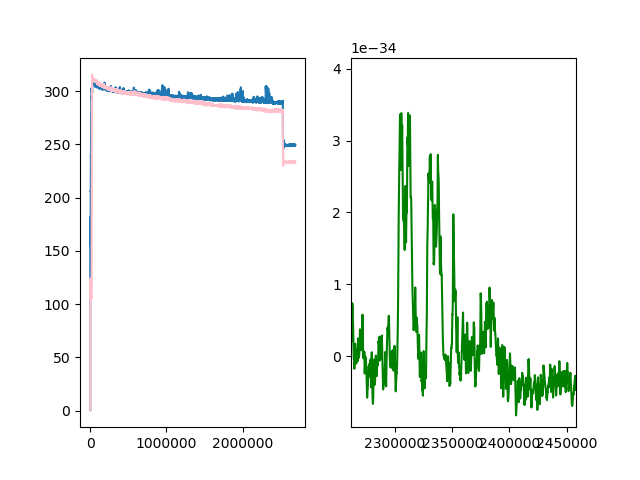

In [36]:
f, ax = plt.subplots(ncols=2)
ax[0].plot(x.data)
ax[0].plot(x.dataUV, 'pink');

ax[1].plot(x.data_filt, color='green')

In [38]:
x.ttls

Tick	[struct]
LT1_	[struct]
LT2_	[struct]
LL1_	[struct]
LL2_	[struct]

<IPython.core.display.Javascript object>


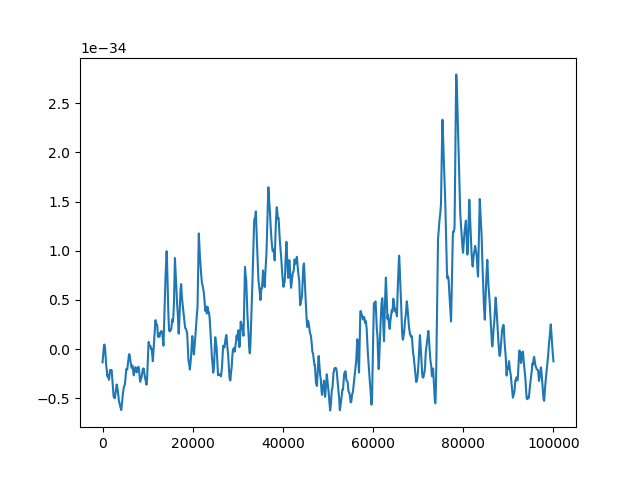

In [10]:
f, ax = plt.subplots()
ax.plot(x.data_filt[1900000:2000000])

In [17]:
x.ttls

Tick	[struct]
LT1_	[struct]
LT2_	[struct]
LL1_	[struct]
LL2_	[struct]

In [24]:
TRANGE = [-1, 2]

tmp = tdt.read_block(file, evtype=['epocs', 'streams'])
newdata = tdt.epoc_filter(tmp, 'LT1/', t=TRANGE)

Found Synapse note file: C:\Test Data\Eelke-181128-085552\Notes.txt
read from t=0s to t=1944.25s


In [27]:
epocs = newdata.streams['D1B2'].filtered

In [30]:
np.shape(epocs[0])

(2035,)

In [31]:
newdata

epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[  55.83712   ,   74.53478656,  101.19220992,  137.5725952 ,
         171.30999552,  196.87649024,  223.06201344,  259.35019776,
         290.42777856,  306.94842112,  343.10377216,  374.15317248,
         400.14454528,  416.31723264,  439.34592768,  476.23728896,
         492.52388608,  518.67438848,  545.61492736,  576.75030272,
         622.04043008,  657.82578944,  683.97629184,  700.06996736,
         722.733504  ,  758.86378752,  779.9585152 ,  806.24496384,
         822.46463232,  853.78408192,  885.4464896 ,  921.2238208 ,
         937.29844992,  958.46706944,  984.54359808, 1015.81700864,
        1052.25633536, 1073.83693056, 1100.074432  , 1132.2007936 ,
        1148.30352128, 1179.60392448, 1217.12914176, 1254.31250688,
        1280.45600512, 1286.46491904],
       [  57.83712   ,   76.53478656,  103.19220992,  139.5725952 ,
         173.30999552,  198.87649024,  225.06201344,  